# Sample for the Blog: Random Lattice Generators Are Not Bad


In [2]:
import qmcpy as qp
import numpy as np  #basic numerical routines in Python
import time  #timing routines
import warnings  #to suppress warnings when needed
from matplotlib import pyplot;  #plotting

pyplot.rc('font', size=16)  #set defaults so that the plots are readable
pyplot.rc('axes', titlesize=16)
pyplot.rc('axes', labelsize=16)
pyplot.rc('xtick', labelsize=16)
pyplot.rc('ytick', labelsize=16)
pyplot.rc('legend', fontsize=16)
pyplot.rc('figure', titlesize=16)

#a helpful plotting method to show increasing numbers of points
def plot_successive_points(distrib,ld_name,first_n=64,n_cols=1,pt_clr='bgkcmy',
                           xlim=[0,1],ylim=[0,1],coord1 = 0,coord2 = 1):
  fig,ax = pyplot.subplots(nrows=1,ncols=n_cols,figsize=(5*n_cols,5.5))
  if n_cols==1: ax = [ax]
  last_n = first_n*(2**n_cols)
  points = distrib.gen_samples(n=last_n)
  for i in range(n_cols):
    n = first_n
    nstart = 0
    for j in range(i+1):
      n = first_n*(2**j)
      ax[i].scatter(points[nstart:n,coord1],points[nstart:n,coord2],color=pt_clr[j])
      nstart = n
    ax[i].set_title('n = %d'%n)
    ax[i].set_xlim(xlim); ax[i].set_xticks(xlim); ax[i].set_xlabel('$x_{i,%d}$'%(coord1+1))
    ax[i].set_ylim(ylim); ax[i].set_yticks(ylim); ax[i].set_ylabel('$x_{i,%d}$'%(coord2+1))
    ax[i].set_aspect((xlim[1]-xlim[0])/(ylim[1]-ylim[0]))
  fig.suptitle('%s Points'%ld_name)

## Lattice Declaration and the gen_samples function

In [5]:
lat = qp.Lattice()
help(lat.__init__)

Help on method __init__ in module qmcpy.discrete_distribution.lattice.lattice:

__init__(dimension=1, randomize=True, order='natural', seed=None, generating_vector='lattice_vec.3600.20.npy', d_max=None, m_max=None) method of qmcpy.discrete_distribution.lattice.lattice.Lattice instance
    Args:
        dimension (int or ndarray): dimension of the generator.
            If an int is passed in, use sequence dimensions [0,...,dimensions-1].
            If a ndarray is passed in, use these dimension indices in the sequence.
        randomize (bool): If True, apply shift to generated samples.
            Note: Non-randomized lattice sequence includes the origin.
        order (str): 'linear', 'natural', or 'mps' ordering.
        seed (None or int or numpy.random.SeedSeq): seed the random number generator for reproducibility
        generating_vector (ndarray, str or int): generating matrix or path to generating matrices.
            ndarray should have shape (d_max).
            a string g

In [6]:
help(lat.gen_samples)

Help on method gen_samples in module qmcpy.discrete_distribution.lattice.lattice:

gen_samples(n=None, n_min=0, n_max=8, warn=True, return_unrandomized=False) method of qmcpy.discrete_distribution.lattice.lattice.Lattice instance
    Generate lattice samples
    
    Args:
        n (int): if n is supplied, generate from n_min=0 to n_max=n samples.
            Otherwise use the n_min and n_max explicitly supplied as the following 2 arguments
        n_min (int): Starting index of sequence.
        n_max (int): Final index of sequence.
        return_unrandomized (bool): return samples without randomization as 2nd return value.
            Will not be returned if randomize=False.
    
    Returns:
        ndarray: (n_max-n_min) x d (dimension) array of samples
    
    Note:
        Lattice generates in blocks from 2**m to 2**(m+1) so generating
        n_min=3 to n_max=9 requires necessarily produces samples from n_min=2 to n_max=16
        and automatically subsets. May be inefficient

### Driver code

Basic information of the lattice

Lattice (DiscreteDistribution Object)
    d               2^(1)
    dvec            [0 1]
    randomize       1
    order           natural
    entropy         120
    spawn_key       ()
[[0.34548142 0.46736834]
 [0.84548142 0.96736834]
 [0.59548142 0.21736834]
 [0.09548142 0.71736834]
 [0.47048142 0.34236834]
 [0.97048142 0.84236834]
 [0.72048142 0.09236834]
 [0.22048142 0.59236834]
 [0.40798142 0.40486834]
 [0.90798142 0.90486834]
 [0.65798142 0.15486834]
 [0.15798142 0.65486834]
 [0.53298142 0.27986834]
 [0.03298142 0.77986834]
 [0.78298142 0.02986834]
 [0.28298142 0.52986834]]


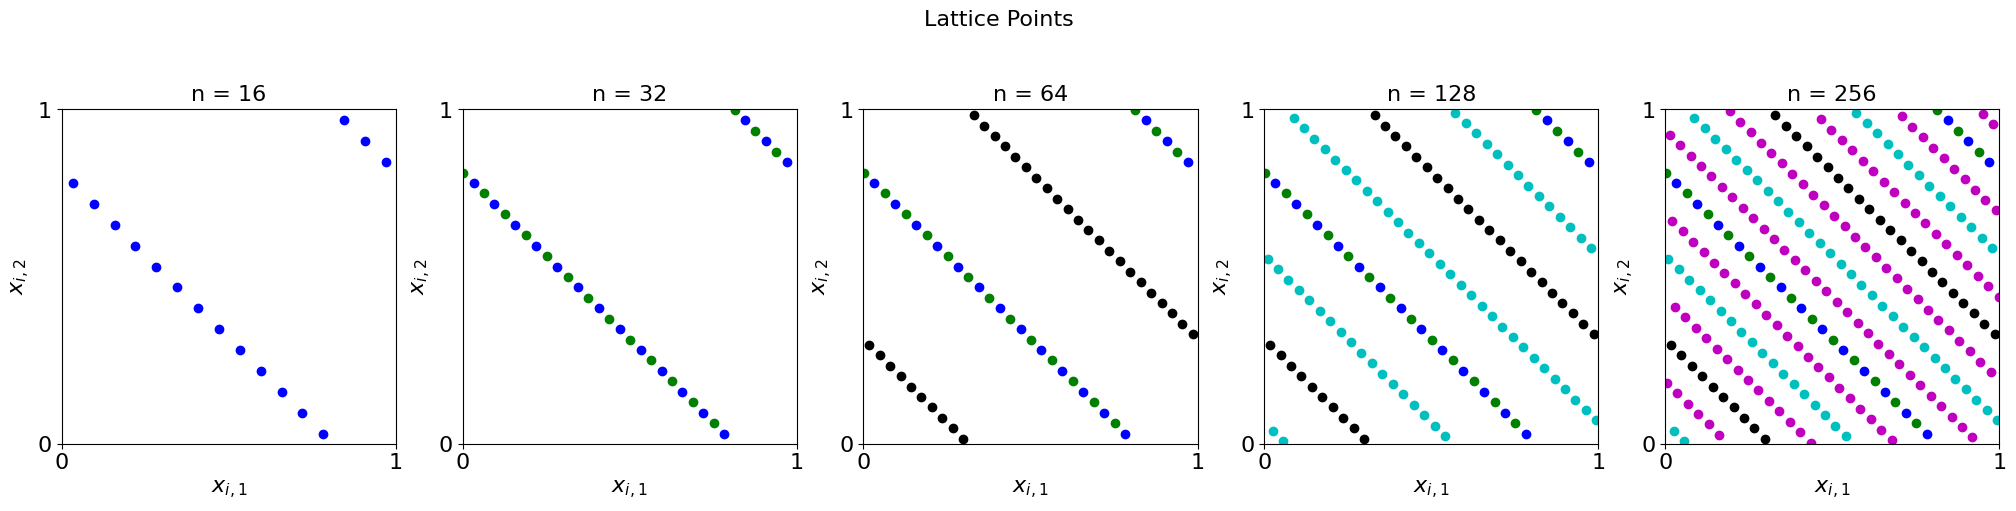

In [ ]:
lat = qp.Lattice(dimension = 2,randomize= True, generating_vector=21, seed = 120) 
print("Basic information of the lattice\n")
print(lat)

n = 16 #number of points in the sample
print(lat.gen_samples(n))
plot_successive_points(lat,'Lattice',n,n_cols=5)

### Plots of lattices

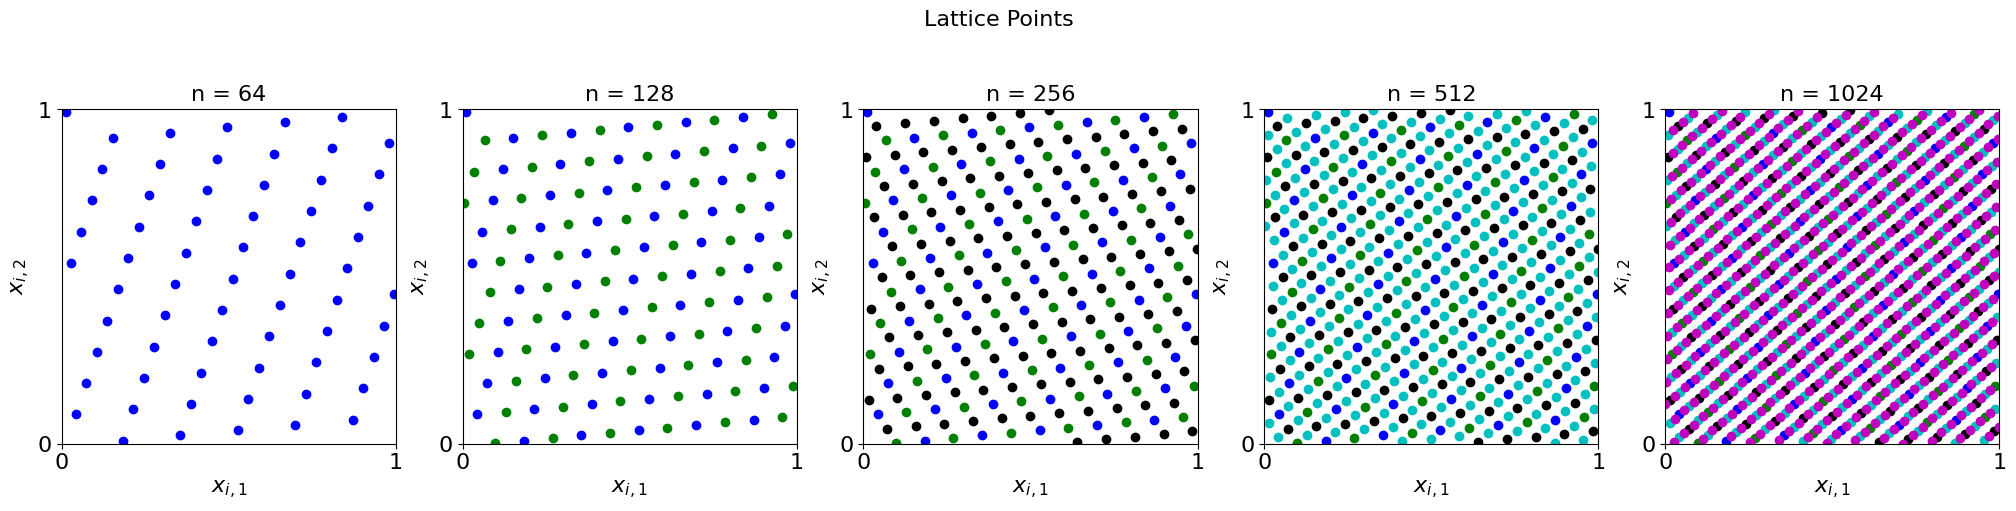

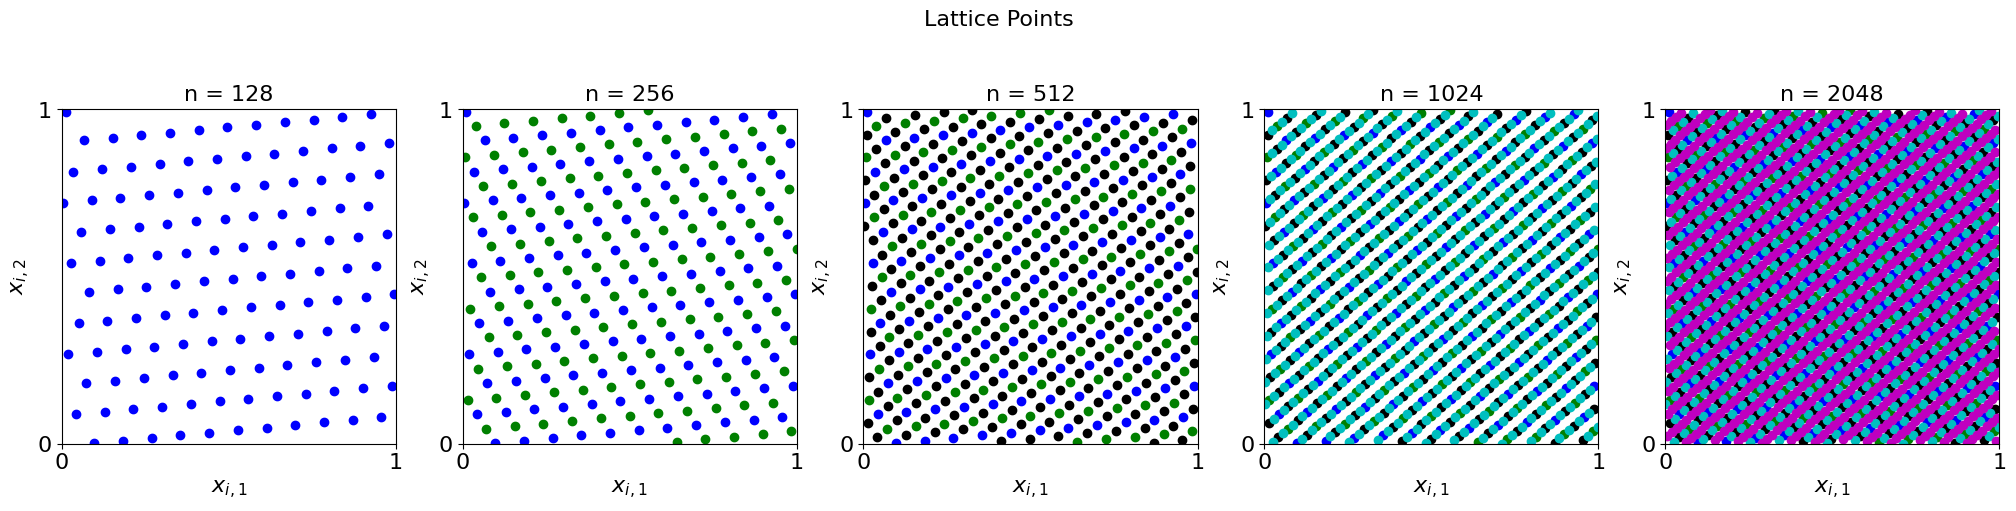

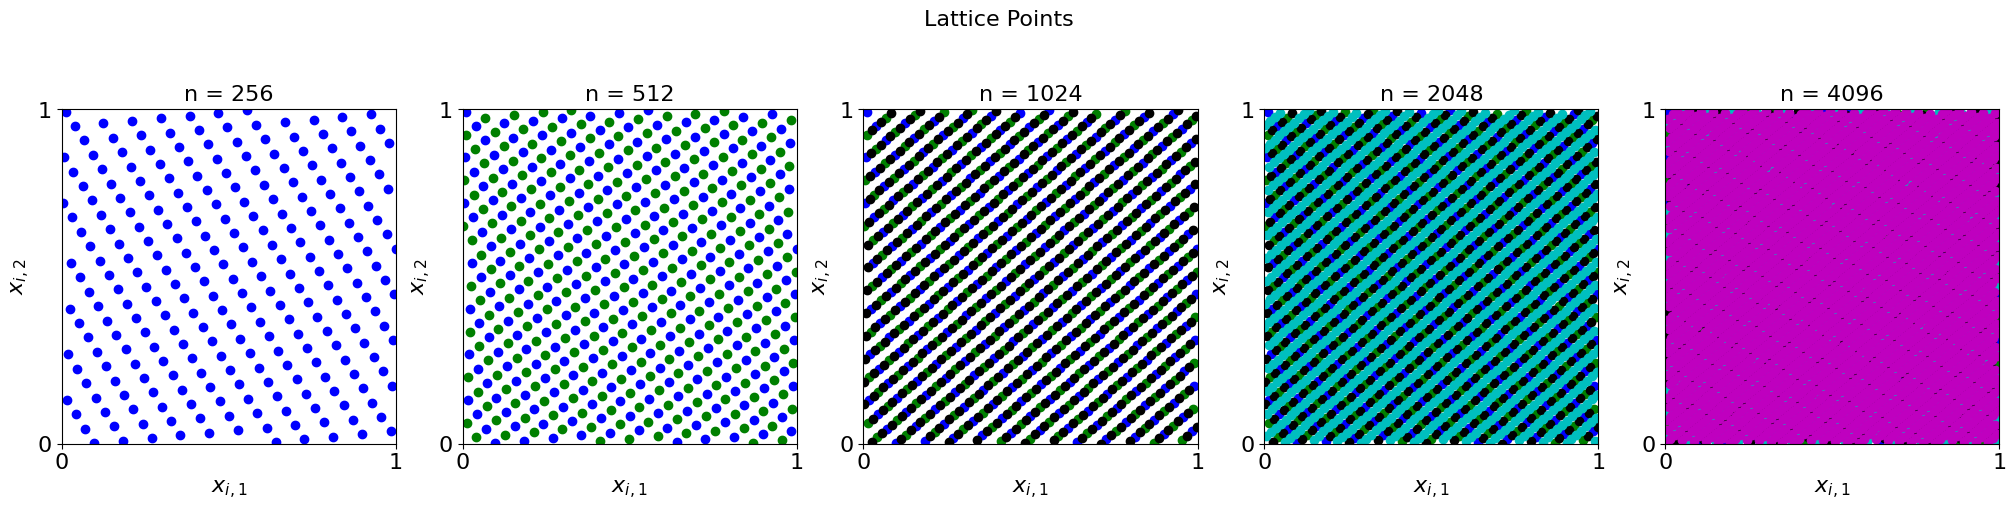

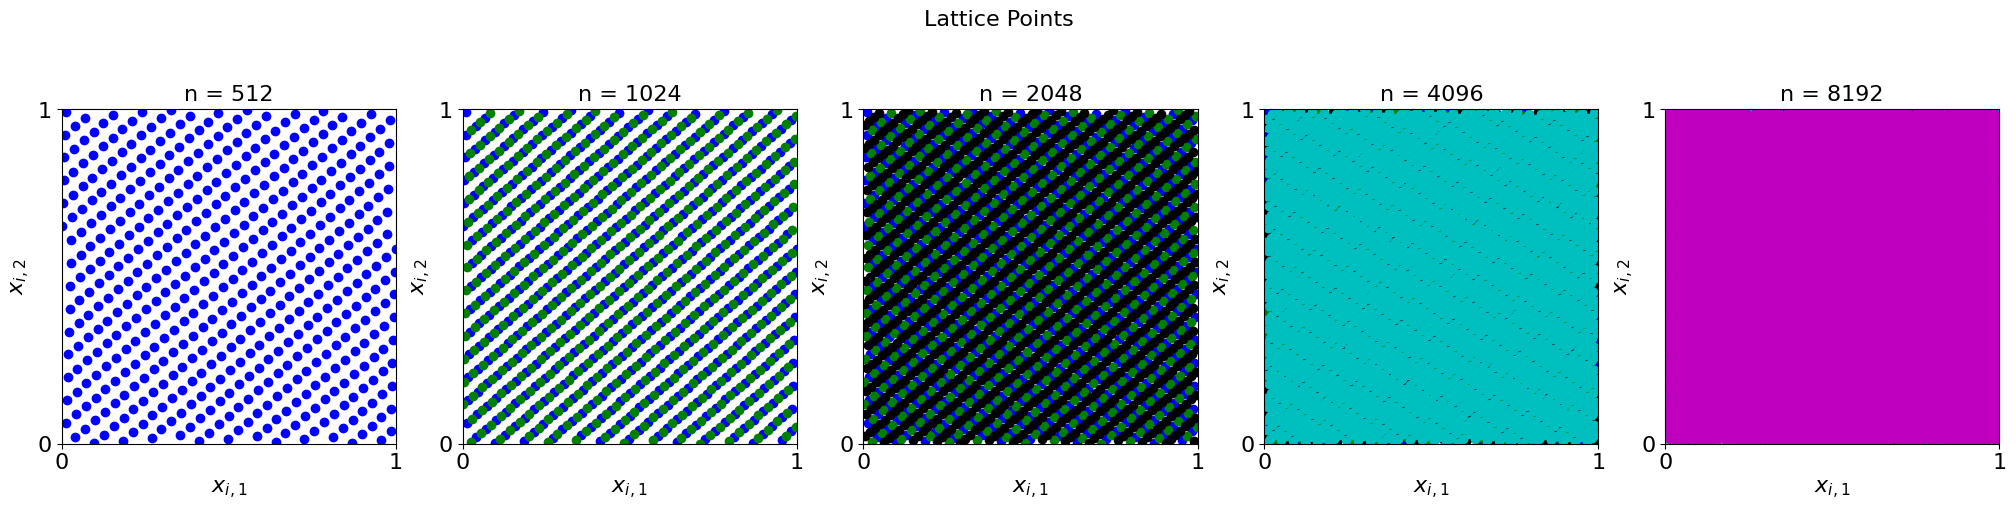

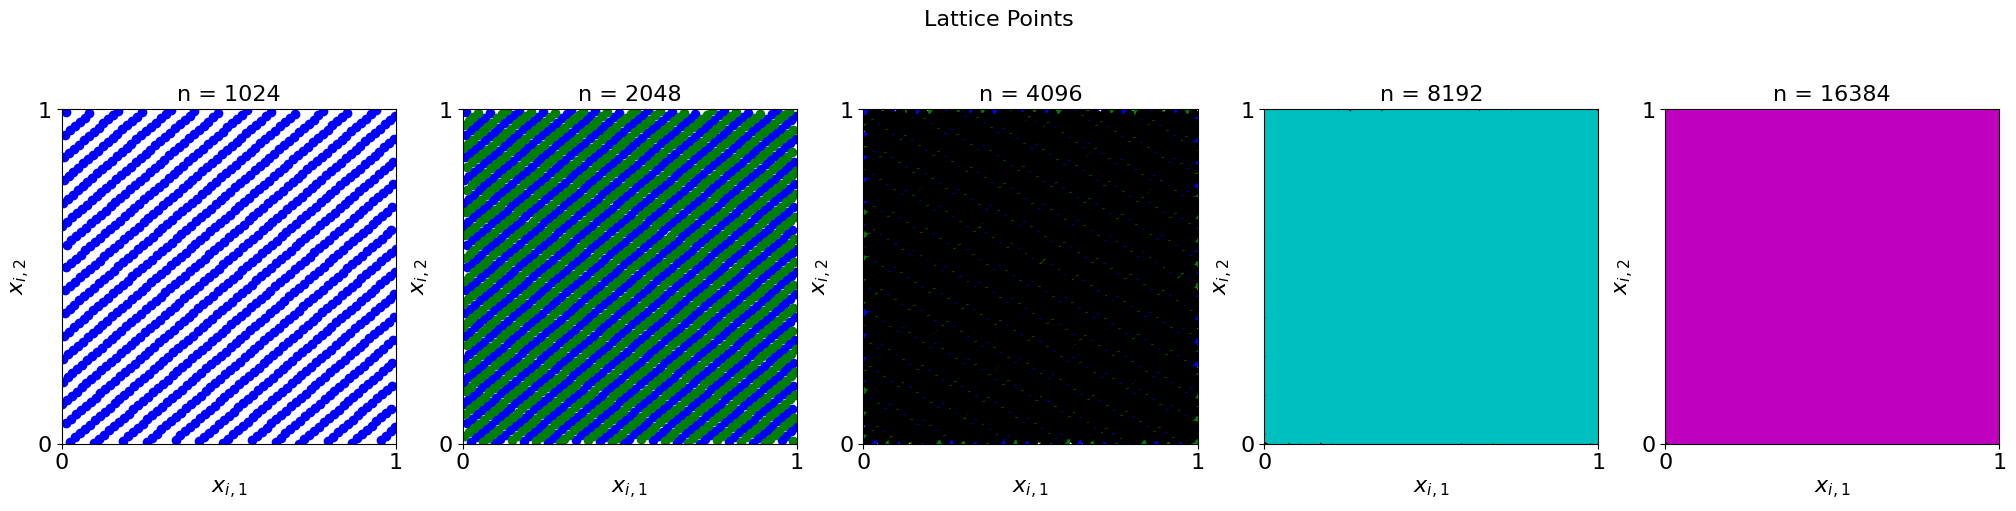

In [ ]:
lat = qp.Lattice(dimension=2,generating_vector= 15)
for n in [64,128,256,512,1024]:
    plot_successive_points(lat,'Lattice',n,n_cols=5)
    


## Integration


### Keister Integral

In [ ]:
d = 5  #coded as parameters so that 
tol = 1e-3  #you can change here and propagate them through this example
lattice = qp.Lattice(d,generating_vector = 20)
gaussian_lattice = qp.Gaussian(lattice, mean = 0, covariance = 1/2)  #mean and covariance of the distribution identified above

keister = qp.Keister(gaussian_lattice) #transform the original integrand to the eventual one
keister_lattice_gauss_g = qp.CubQMCLatticeG(keister, abs_tol = tol)  #using Tony's stopping criterion]

solution, data = keister_lattice_gauss_g.integrate()
print(data)
print('\n')
print(solution)


LDTransformData (AccumulateData Object)
    solution        1.135
    comb_bound_low  1.135
    comb_bound_high 1.136
    comb_flags      1
    n_total         2^(17)
    n               2^(17)
    time_integrate  0.659
CubQMCLatticeG (StoppingCriterion Object)
    abs_tol         0.001
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
Keister (Integrand Object)
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     PCA
    transform       Gaussian (TrueMeasure Object)
                       mean            0
                       covariance      2^(-1)
                       decomp_type     PCA
Lattice (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       1
    order           natural
    entropy         138055607062872085940486755578512845134
    spawn_key       ()


[1.13547987]


### Note here on choosing integer generating vectors

For the coded example above, your will get an error saything that the sample size is too small if your generating vector is less than 17. This is because the default n_max(maximum number of samples) is $2^{35}$, while the maximum sample size provided by the generating vector (say, $r$) is $2^{(2r+1)}$, which is why $r$ needs to be greater than or equal to 17.


For example, look at the following code:

In [ ]:
# #This will raise an error
# d = 5  #coded as parameters so that 
# tol = 1e-3  #you can change here and propagate them through this example
# lattice = qp.Lattice(d,generating_vector = 16)
# gaussian_lattice = qp.Gaussian(lattice, mean = 0, covariance = 1/2)  #mean and covariance of the distribution identified above

# keister = qp.Keister(gaussian_lattice) #transform the original integrand to the eventual one
# keister_lattice_gauss_g = qp.CubQMCLatticeG(keister, abs_tol = tol)  #using Tony's stopping criterion]

# solution, data = keister_lattice_gauss_g.integrate()
# print(data)
# print('\n')
# print(solution)


In [ ]:
#While this snippit won't. The ONLY difference here is the genera†ing vector
d = 5  #coded as parameters so that 
tol = 1e-3  #you can change here and propagate them through this example
lattice = qp.Lattice(d,generating_vector = 17)
gaussian_lattice = qp.Gaussian(lattice, mean = 0, covariance = 1/2)  #mean and covariance of the distribution identified above

keister = qp.Keister(gaussian_lattice) #transform the original integrand to the eventual one
keister_lattice_gauss_g = qp.CubQMCLatticeG(keister, abs_tol = tol)  #using Tony's stopping criterion]

solution, data = keister_lattice_gauss_g.integrate()
print(data)
print('\n')
print(solution)


LDTransformData (AccumulateData Object)
    solution        1.137
    comb_bound_low  1.136
    comb_bound_high 1.138
    comb_flags      1
    n_total         2^(17)
    n               2^(17)
    time_integrate  0.657
CubQMCLatticeG (StoppingCriterion Object)
    abs_tol         0.001
    rel_tol         0
    n_init          2^(10)
    n_max           2^(35)
Keister (Integrand Object)
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     PCA
    transform       Gaussian (TrueMeasure Object)
                       mean            0
                       covariance      2^(-1)
                       decomp_type     PCA
Lattice (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       1
    order           natural
    entropy         291552736386814678479435739290477532657
    spawn_key       ()


[1.1368926]


### Ways to work around the above problem

If you are not concerned about meeting an error tolerance but can only afford n_max function values, then you can set an abs_tol small enough and set n_max to your desired sample size. You will get an error bound.

In [ ]:
warnings.simplefilter("ignore")
lattice = qp.Lattice(d,generating_vector = 6)
keister_lattice_gauss_g_small_n = qp.CubQMCLatticeG(keister, abs_tol = 1e-6, n_max = 2**12)  #the default n_max is 2**35
solution, data = keister_lattice_gauss_g_small_n.integrate()
print(data)

LDTransformData (AccumulateData Object)
    solution        1.121
    comb_bound_low  1.111
    comb_bound_high 1.131
    comb_flags      0
    n_total         2^(12)
    n               2^(12)
    time_integrate  0.028
CubQMCLatticeG (StoppingCriterion Object)
    abs_tol         1.00e-06
    rel_tol         0
    n_init          2^(10)
    n_max           2^(12)
Keister (Integrand Object)
Gaussian (TrueMeasure Object)
    mean            0
    covariance      2^(-1)
    decomp_type     PCA
    transform       Gaussian (TrueMeasure Object)
                       mean            0
                       covariance      2^(-1)
                       decomp_type     PCA
Lattice (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       1
    order           natural
    entropy         291552736386814678479435739290477532657
    spawn_key       ()


The price is that accuracy drops quite significantly with the reduction of sample sizes. As you can see by comparing values.

### Customized integration

In [ ]:
def my_func(x):
    
    """  
    x: nxd numpy ndarray
       n samples
       d dimensions

    returns n-vector of the Kesiter function
    evaluated at the n input samples
    """

    d = x.shape[1];
    